In [185]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [186]:
# YOUR CODE HERE AND INSERT ADDITIONAL CELS AS NEEDED.

# https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-areas.csv

import pandas as pd

state_square = pd.read_csv('https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-areas.csv', delimiter=',')
state_square['state']=state_square['state'].str.upper()
state_square.rename(columns={'state':'STATE'},inplace=True)
state_square.head()

,STATE,area (sq. mi)
0,ALABAMA,52423
1,ALASKA,656425
2,ARIZONA,114006
3,ARKANSAS,53182
4,CALIFORNIA,163707


In [187]:
# 导入美国各州的风险指数数据
danger_USA=pd.read_csv(r'D:\VSCodeWorkSpace\2024_C\dataprocess\dataset_process\danger_factor_USA.csv')
danger_USA


,STATE,danger_factor
0,ALABAMA,4.927396
1,ALASKA,0.036786
2,AMERICAN SAMOA,0.062924
3,ARIZONA,4.495644
4,ARKANSAS,4.541142
5,CALIFORNIA,5.031946
6,COLORADO,6.575992
7,CONNECTICUT,0.797677
8,DELAWARE,0.214908
9,DISTRICT OF COLUMBIA,0.098742


In [188]:
gdp_per_capita_USA=pd.read_csv(r"D:\VSCodeWorkSpace\2024_C\dataprocess\gdp_per_capita.csv")
#只保留Q1列
gdp_per_capita_USA=gdp_per_capita_USA[['State Name','Per Capita GDP']]
gdp_per_capita_USA.rename(columns={'State Name':'STATE'},inplace=True)
gdp_per_capita_USA['STATE']=gdp_per_capita_USA['STATE'].str.upper()
gdp_per_capita_USA.head()


,STATE,Per Capita GDP
0,CONNECTICUT,77899.16
1,MAINE,48589.06
2,MASSACHUSETTS,83079.04
3,NEW HAMPSHIRE,61783.82
4,RHODE ISLAND,54880.31


In [189]:
gdp_USA=pd.read_csv(r"D:\VSCodeWorkSpace\2024_C\dataprocess\dataset_process\gdp.csv")
# print(gdp_USA)
# 把gdp_USA数据中Q1-Q4列的数据对应行求和，保存到新的一列GDP中
gdp_USA['GDP'] = gdp_USA[['Q1', 'Q2', 'Q3', 'Q4p']].sum(axis=1)
gdp_USA.drop(['Q1', 'Q2', 'Q3', 'Q4p'], axis=1, inplace=True)
# print(gdp_USA)

# STATE转大写字母
gdp_USA['STATE'] = gdp_USA['STATE'].str.upper()
gdp_USA.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   STATE   60 non-null     object
 1   GDP     60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [190]:
# 导入美国各州的字典
USA_state = pd.read_excel(r"D:\VSCodeWorkSpace\2024_C\data\State-Abbreviations.xlsx")
USA_state['State Name']=USA_state['State Name'].str.upper()
USA_state_dict=USA_state[['State Name']].reset_index(drop=True)
USA_state_dict

,State Name
0,ALABAMA
1,ALASKA
2,ARIZONA
3,ARKANSAS
4,CALIFORNIA
5,COLORADO
6,CONNECTICUT
7,DELAWARE
8,FLORIDA
9,GEORGIA


In [191]:
# 保留danger_USA['STATE']与USA_state_dic['State Name']的公共部分
danger_USA = danger_USA[danger_USA['STATE'].isin(USA_state_dict['State Name'])]
danger_USA.reset_index(drop=True, inplace=True)
USA_state_dict.info()
gdp_USA.info()
# 去掉gdp_USA中不在字典里的行
gdp_USA['STATE'] = gdp_USA['STATE'].str.strip()
gdp_USA = gdp_USA[gdp_USA['STATE'].isin(USA_state_dict['State Name'])]
gdp_USA.reset_index(drop=True, inplace=True)
gdp_USA.info()
# 找到不再STATE里的州，并去掉
gdp_per_capita_USA['STATE'] = gdp_per_capita_USA['STATE'].str.strip()
gdp_per_capita_USA = gdp_per_capita_USA[gdp_per_capita_USA['STATE'].isin(USA_state_dict['State Name'])]
gdp_per_capita_USA.reset_index(drop=True, inplace=True)
gdp_per_capita_USA.info()
state_square['STATE']=state_square['STATE'].str.strip()
state_square = state_square[state_square['STATE'].isin(USA_state_dict['State Name'])]
state_square.reset_index(drop=True, inplace=True)
state_square.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   State Name  50 non-null     object
dtypes: object(1)
memory usage: 528.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   STATE   60 non-null     object
 1   GDP     60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   STATE   50 non-null     object
 1   GDP     50 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 928.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column          Non-Null Coun

In [192]:
# 导入人口数据
population_USA = pd.read_csv(r"D:\VSCodeWorkSpace\2024_C\dataprocess\dataset_process\population.csv")
population_USA['STATE']=population_USA['STATE'].str.upper()

In [193]:
population_USA = population_USA[population_USA['STATE'].isin(USA_state_dict['State Name'])]
population_USA.reset_index(drop=True, inplace=True)
population_USA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Population  50 non-null     int64 
 1   STATE       50 non-null     object
dtypes: int64(1), object(1)
memory usage: 928.0+ bytes


In [194]:
#合并gdp danger population数据
USA_data = pd.merge(danger_USA, gdp_USA, on='STATE', how='left')
USA_data = pd.merge(USA_data, population_USA, on='STATE', how='left')
USA_data = pd.merge(USA_data, gdp_per_capita_USA, on='STATE', how='left')
USA_data = pd.merge(USA_data, state_square, on='STATE', how='left')
# 转化为浮点型

USA_data['GDP']=USA_data['GDP'].astype(float)
USA_data['Population']=USA_data['Population'].astype(float)
USA_data['area (sq. mi)']=USA_data['area (sq. mi)'].astype(float)
USA_data.reset_index(drop=True, inplace=True)
USA_data.to_csv(r'result/USA_TOPSIS_data.csv',index=False)
USA_data


,STATE,danger_factor,GDP,Population,Per Capita GDP,area (sq. mi)
0,ALABAMA,4.927396,899481.0,5024279.0,44756.72,52423.0
1,ALASKA,0.036786,200986.0,733391.0,68512.57,656425.0
2,ARIZONA,4.495644,1489844.0,7151502.0,52081.51,114006.0
3,ARKANSAS,4.541142,516295.0,3011524.0,42859.94,53182.0
4,CALIFORNIA,5.031946,12367486.0,39538223.0,78199.56,163707.0
5,COLORADO,6.575992,1560395.0,5773714.0,67564.61,104100.0
6,CONNECTICUT,0.797677,1123600.0,3605944.0,77899.16,5544.0
7,DELAWARE,0.214908,302050.0,989948.0,76279.26,1954.0
8,FLORIDA,3.355276,4383553.0,21538187.0,50881.17,65758.0
9,GEORGIA,3.941917,2476961.0,10711908.0,57808.59,59441.0


In [195]:
import pandas as pd
from topsispy import topsis

# 假设data_USA包含'GDP'、'population'和'danger_data'列
# 指定指标权重
weights = [0.3, 0.1, 0.3,0.2,0.1]

# 指定指标的优劣类型（"max"表示越大越好，"min"表示越小越好）
criteria = ["max", "max", "max","max","max"]

# 进行TOPSIS得分计算
a=USA_data[['GDP', 'Population', 'danger_factor','Per Capita GDP','area (sq. mi)']]
# print(a)
# 去掉列名
# a = a.drop(['GDP', 'Population', 'danger_factor'], axis=1)
# 将dataframe的值（除列名）转化为一个矩阵
a = a.values
# print(a)
result = topsis(a, weights, criteria)
# print(result)
b=pd.DataFrame(result[1])
# print(b)

# 将得分结果添加到原始DataFrame中
USA_data['topsis_score'] = b

# 按TOPSIS得分降序排列
topsis_USA = USA_data.sort_values(by='topsis_score', ascending=False)
topsis_USA.reset_index(drop=True, inplace=True)
# 打印结果
print(topsis_USA[['STATE', 'topsis_score']])
topsis_USA.to_csv(r'result/topsis_USA.csv',index=False)
topsis_USA

             STATE  topsis_score
0          VERMONT      0.978415
1     RHODE ISLAND      0.973197
2            MAINE      0.971961
3            IDAHO      0.962885
4    WEST VIRGINIA      0.960653
5    NEW HAMPSHIRE      0.956008
6           HAWAII      0.945344
7         DELAWARE      0.941537
8           NEVADA      0.939929
9          WYOMING      0.934478
10            UTAH      0.932109
11          OREGON      0.930662
12  SOUTH CAROLINA      0.927977
13     CONNECTICUT      0.916815
14         MONTANA      0.910120
15    NORTH DAKOTA      0.908270
16         INDIANA      0.898811
17        MARYLAND      0.897832
18       LOUISIANA      0.889268
19        KENTUCKY      0.889198
20        ARKANSAS      0.883791
21        MICHIGAN      0.877935
22       WISCONSIN      0.877253
23       TENNESSEE      0.868408
24     MISSISSIPPI      0.867976
25         ALABAMA      0.867575
26   MASSACHUSETTS      0.863541
27      WASHINGTON      0.858340
28         ARIZONA      0.853798
29      NE

,STATE,danger_factor,GDP,Population,Per Capita GDP,area (sq. mi),topsis_score
0,VERMONT,0.369797,131188.0,643077.0,51000.11,9615.0,0.978415
1,RHODE ISLAND,0.213940,240898.0,1097379.0,54880.31,1545.0,0.973197
2,MAINE,0.713456,264783.0,1362359.0,48589.06,35387.0,0.971961
3,IDAHO,0.396902,336129.0,1839106.0,45691.90,83574.0,0.962885
4,WEST VIRGINIA,1.487899,294837.0,1793716.0,41093.04,24231.0,0.960653
5,NEW HAMPSHIRE,0.895450,340436.0,1377529.0,61783.82,9351.0,0.956008
6,HAWAII,1.577928,359425.0,1455271.0,61745.37,10932.0,0.945344
7,DELAWARE,0.214908,302050.0,989948.0,76279.26,1954.0,0.941537
8,NEVADA,0.465634,690390.0,3104614.0,55593.87,110567.0,0.939929
9,WYOMING,1.606970,144966.0,576851.0,62826.45,97818.0,0.934478


In [196]:
#根据topsisscore划分等级，高于0.85为优，介于0.7-0.85为中，低于0.7为差。将结果映射到topsis_score中
topsis_USA['topsis_score_level'] = topsis_USA['topsis_score'].apply(
    lambda x: 'A' if x >= 0.9 
    else 'B' if x < 0.9 and x >= 0.8 
    else 'C')
topsis_USA.to_csv(r'result/topsis_USA_level.csv',index=False)
topsis_USA

,STATE,danger_factor,GDP,Population,Per Capita GDP,area (sq. mi),topsis_score,topsis_score_level
0,VERMONT,0.369797,131188.0,643077.0,51000.11,9615.0,0.978415,A
1,RHODE ISLAND,0.213940,240898.0,1097379.0,54880.31,1545.0,0.973197,A
2,MAINE,0.713456,264783.0,1362359.0,48589.06,35387.0,0.971961,A
3,IDAHO,0.396902,336129.0,1839106.0,45691.90,83574.0,0.962885,A
4,WEST VIRGINIA,1.487899,294837.0,1793716.0,41093.04,24231.0,0.960653,A
5,NEW HAMPSHIRE,0.895450,340436.0,1377529.0,61783.82,9351.0,0.956008,A
6,HAWAII,1.577928,359425.0,1455271.0,61745.37,10932.0,0.945344,A
7,DELAWARE,0.214908,302050.0,989948.0,76279.26,1954.0,0.941537,A
8,NEVADA,0.465634,690390.0,3104614.0,55593.87,110567.0,0.939929,A
9,WYOMING,1.606970,144966.0,576851.0,62826.45,97818.0,0.934478,A


In [197]:
state_mapping = {
    'ALABAMA': 'AL',
    'ALASKA': 'AK',
    'ARIZONA': 'AZ',
    'ARKANSAS': 'AR',
    'CALIFORNIA': 'CA',
    'COLORADO': 'CO',
    'CONNECTICUT': 'CT',
    'DELAWARE': 'DE',
    'FLORIDA': 'FL',
    'GEORGIA': 'GA',
    'HAWAII': 'HI',
    'IDAHO': 'ID',
    'ILLINOIS': 'IL',
    'INDIANA': 'IN',
    'IOWA': 'IA',
    'KANSAS': 'KS',
    'KENTUCKY': 'KY',
    'LOUISIANA': 'LA',
    'MAINE': 'ME',
    'MARYLAND': 'MD',
    'MASSACHUSETTS': 'MA',
    'MICHIGAN': 'MI',
    'MINNESOTA': 'MN',
    'MISSISSIPPI': 'MS',
    'MISSOURI': 'MO',
    'MONTANA': 'MT',
    'NEBRASKA': 'NE',
    'NEVADA': 'NV',
    'NEW HAMPSHIRE': 'NH',
    'NEW JERSEY': 'NJ',
    'NEW MEXICO': 'NM',
    'NEW YORK': 'NY',
    'NORTH CAROLINA': 'NC',
    'NORTH DAKOTA': 'ND',
    'OHIO': 'OH',
    'OKLAHOMA': 'OK',
    'OREGON': 'OR',
    'PENNSYLVANIA': 'PA',
    'RHODE ISLAND': 'RI',
    'SOUTH CAROLINA': 'SC',
    'SOUTH DAKOTA': 'SD',
    'TENNESSEE': 'TN',
    'TEXAS': 'TX',
    'UTAH': 'UT',
    'VERMONT': 'VT',
    'VIRGINIA': 'VA',
    'WASHINGTON': 'WA',
    'WEST VIRGINIA': 'WV',
    'WISCONSIN': 'WI',
    'WYOMING': 'WY'
}

In [ ]:
# 绘制评分分布图
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
topsis_USA['STATE'] = topsis_USA['STATE'].replace(state_mapping)


# 使用plotly.express绘制地图
fig = px.choropleth(topsis_USA, locations='STATE',
                    locationmode='USA-states', color='topsis_score',
                    scope='usa', 
                    color_continuous_scale='Magma',
                    # color_continuous_midpoint=15,  # 设置颜色划分的中点值
                    # range_color=(1,1),  # 设置颜色划分的步长
                    labels={'topsis_score': 'topsis_score'})


# 设置图表布局
fig.update_layout(title_text='U.S. Regional Scores', title_font_size=20)
# Get the states with higher danger_factor values
#保存图片
# fig.write_image("result/topsis_USA_score.png")
# fig.write_html("result/topsis_USA_score.html")
fig.show()

In [238]:
# 绘制评分分布图
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
topsis_USA['STATE'] = topsis_USA['STATE'].replace(state_mapping)


# 使用plotly.express绘制地图
fig = px.choropleth(topsis_USA, locations='STATE',
                    locationmode='USA-states', color='GDP',
                    scope='usa', 
                    color_continuous_scale=px.colors.sequential.Blues,
                    # color_continuous_midpoint=15,  # 设置颜色划分的中点值
                    # range_color=(1,1),  # 设置颜色划分的步长
                    labels={'GDP': 'GDP'})


# 设置图表布局
fig.update_layout(title_text='U.S. Regional GDP', title_font_size=20)
# Get the states with higher danger_factor values
#保存图片
# fig.write_image("result/topsis_USA_score.png")
# fig.write_html("result/topsis_USA_score.html")
# fig.write_image("result/topsis_USA_GDP.png", width=1000, height=600)
fig.write_html("result/topsis_USA_GDP.html")
fig.show()

In [241]:
# 绘制评分分布图
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
topsis_USA['STATE'] = topsis_USA['STATE'].replace(state_mapping)


# 使用plotly.express绘制地图
fig = px.choropleth(topsis_USA, locations='STATE',
                    locationmode='USA-states', color='Population',
                    scope='usa', 
                    color_continuous_scale='Hot',
                    # color_continuous_midpoint=15,  # 设置颜色划分的中点值
                    # range_color=(1,1),  # 设置颜色划分的步长
                    labels={'Population': 'Population'})


# 设置图表布局
fig.update_layout(title_text='U.S. Regional Population', title_font_size=20)
# Get the states with higher danger_factor values
#保存图片
# fig.write_image("result/topsis_USA_score.png")
# fig.write_html("result/topsis_USA_score.html")
# fig.write_image("result/topsis_USA_GDP.png", width=1000, height=600)
# fig.write_html("result/topsis_USA_GDP.html")
fig.show()

In [260]:
# 绘制评分分布图
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import kaleido #required
kaleido.__version__ #0.2.1

import plotly
plotly.__version__ #5.5.0
topsis_USA['STATE'] = topsis_USA['STATE'].replace(state_mapping)


# 使用plotly.express绘制地图
fig = px.choropleth(topsis_USA, locations='STATE',
                    locationmode='USA-states', color='area (sq. mi)',
                    scope='usa', 
                    color_continuous_scale='Picnic',
                    # color_continuous_midpoint=15,  # 设置颜色划分的中点值
                    # range_color=(1,1),  # 设置颜色划分的步长
                    labels={'area (sq. mi)': 'area (sq. mi)'})


# 设置图表布局
fig.update_layout(title_text='U.S. Regional area ', title_font_size=20)
# Get the states with higher danger_factor values
#保存图片
# fig.write_image("result/topsis_USA_score.png")
# fig.write_html("result/topsis_USA_score.html")
fig.write_image("result/topsis_USA_GDP.png", width=1000, height=600)
# fig.write_html("result/topsis_USA_GDP.html")
fig.show()



ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


In [ ]:
# 绘制评分分布图
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
topsis_USA['STATE'] = topsis_USA['STATE'].replace(state_mapping)


# 使用plotly.express绘制地图
fig = px.choropleth(topsis_USA, locations='STATE',
                    locationmode='USA-states', color='GDP',
                    scope='usa', 
                    color_continuous_scale=px.colors.sequential.Blues,
                    # color_continuous_midpoint=15,  # 设置颜色划分的中点值
                    # range_color=(1,1),  # 设置颜色划分的步长
                    labels={'GDP': 'GDP'})


# 设置图表布局
fig.update_layout(title_text='U.S. Regional GDP', title_font_size=20)
# Get the states with higher danger_factor values
#保存图片
# fig.write_image("result/topsis_USA_score.png")
# fig.write_html("result/topsis_USA_score.html")
# fig.write_image("result/topsis_USA_GDP.png", width=1000, height=600)
fig.write_html("result/topsis_USA_GDP.html")
fig.show()

In [ ]:
# 绘制评分分布图
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
topsis_USA['STATE'] = topsis_USA['STATE'].replace(state_mapping)


# 使用plotly.express绘制地图
fig = px.choropleth(topsis_USA, locations='STATE',
                    locationmode='USA-states', color='GDP',
                    scope='usa', 
                    color_continuous_scale=px.colors.sequential.Blues,
                    # color_continuous_midpoint=15,  # 设置颜色划分的中点值
                    # range_color=(1,1),  # 设置颜色划分的步长
                    labels={'GDP': 'GDP'})


# 设置图表布局
fig.update_layout(title_text='U.S. Regional GDP', title_font_size=20)
# Get the states with higher danger_factor values
#保存图片
# fig.write_image("result/topsis_USA_score.png")
# fig.write_html("result/topsis_USA_score.html")
# fig.write_image("result/topsis_USA_GDP.png", width=1000, height=600)
fig.write_html("result/topsis_USA_GDP.html")
fig.show()

In [ ]:
# 绘制评分分布图
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
topsis_USA['STATE'] = topsis_USA['STATE'].replace(state_mapping)


# 使用plotly.express绘制地图
fig = px.choropleth(topsis_USA, locations='STATE',
                    locationmode='USA-states', color='GDP',
                    scope='usa', 
                    color_continuous_scale=px.colors.sequential.Blues,
                    # color_continuous_midpoint=15,  # 设置颜色划分的中点值
                    # range_color=(1,1),  # 设置颜色划分的步长
                    labels={'GDP': 'GDP'})


# 设置图表布局
fig.update_layout(title_text='U.S. Regional GDP', title_font_size=20)
# Get the states with higher danger_factor values
#保存图片
# fig.write_image("result/topsis_USA_score.png")
# fig.write_html("result/topsis_USA_score.html")
# fig.write_image("result/topsis_USA_GDP.png", width=1000, height=600)
fig.write_html("result/topsis_USA_GDP.html")
fig.show()

In [ ]:
# 绘制评分分布图
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
topsis_USA['STATE'] = topsis_USA['STATE'].replace(state_mapping)


# 使用plotly.express绘制地图
fig = px.choropleth(topsis_USA, locations='STATE',
                    locationmode='USA-states', color='GDP',
                    scope='usa', 
                    color_continuous_scale=px.colors.sequential.Blues,
                    # color_continuous_midpoint=15,  # 设置颜色划分的中点值
                    # range_color=(1,1),  # 设置颜色划分的步长
                    labels={'GDP': 'GDP'})


# 设置图表布局
fig.update_layout(title_text='U.S. Regional GDP', title_font_size=20)
# Get the states with higher danger_factor values
#保存图片
# fig.write_image("result/topsis_USA_score.png")
# fig.write_html("result/topsis_USA_score.html")
# fig.write_image("result/topsis_USA_GDP.png", width=1000, height=600)
fig.write_html("result/topsis_USA_GDP.html")
fig.show()

In [ ]:
# 绘制评分分布图
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
topsis_USA['STATE'] = topsis_USA['STATE'].replace(state_mapping)


# 使用plotly.express绘制地图
fig = px.choropleth(topsis_USA, locations='STATE',
                    locationmode='USA-states', color='GDP',
                    scope='usa', 
                    color_continuous_scale=px.colors.sequential.Blues,
                    # color_continuous_midpoint=15,  # 设置颜色划分的中点值
                    # range_color=(1,1),  # 设置颜色划分的步长
                    labels={'GDP': 'GDP'})


# 设置图表布局
fig.update_layout(title_text='U.S. Regional GDP', title_font_size=20)
# Get the states with higher danger_factor values
#保存图片
# fig.write_image("result/topsis_USA_score.png")
# fig.write_html("result/topsis_USA_score.html")
# fig.write_image("result/topsis_USA_GDP.png", width=1000, height=600)
fig.write_html("result/topsis_USA_GDP.html")
fig.show()

相关性矩阵：
                danger_factor       GDP  Population  Per Capita GDP  \
danger_factor        1.000000  0.335558    0.405056       -0.077604   
GDP                  0.335558  1.000000    0.978867        0.416665   
Population           0.405056  0.978867    1.000000        0.299898   
Per Capita GDP      -0.077604  0.416665    0.299898        1.000000   
area (sq. mi)        0.213181  0.128910    0.132673        0.086011   

                area (sq. mi)  
danger_factor        0.213181  
GDP                  0.128910  
Population           0.132673  
Per Capita GDP       0.086011  
area (sq. mi)        1.000000  


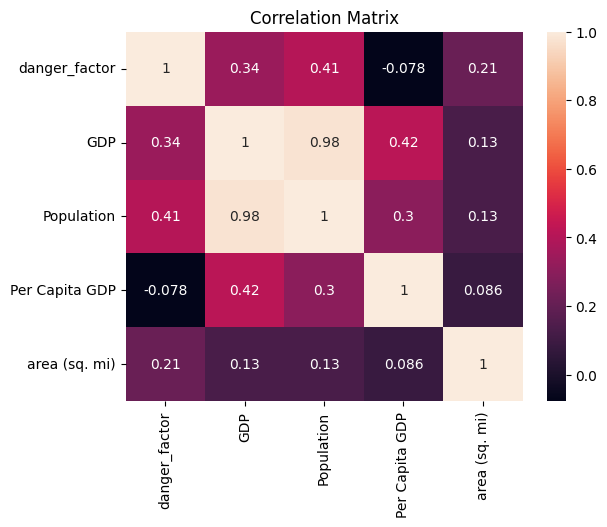

In [199]:
#数据相关性分析
data=topsis_USA[['danger_factor','GDP','Population','Per Capita GDP','area (sq. mi)']]
correlation_matrix = data.corr()
# 打印相关性矩阵
print("相关性矩阵：")
print(correlation_matrix)
# 绘制热力图
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.savefig('result/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()
#保存图片



C:\Users\JiangJinrui\AppData\Local\Temp\ipykernel_16376\3680760483.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


d:\Python3.9.7\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



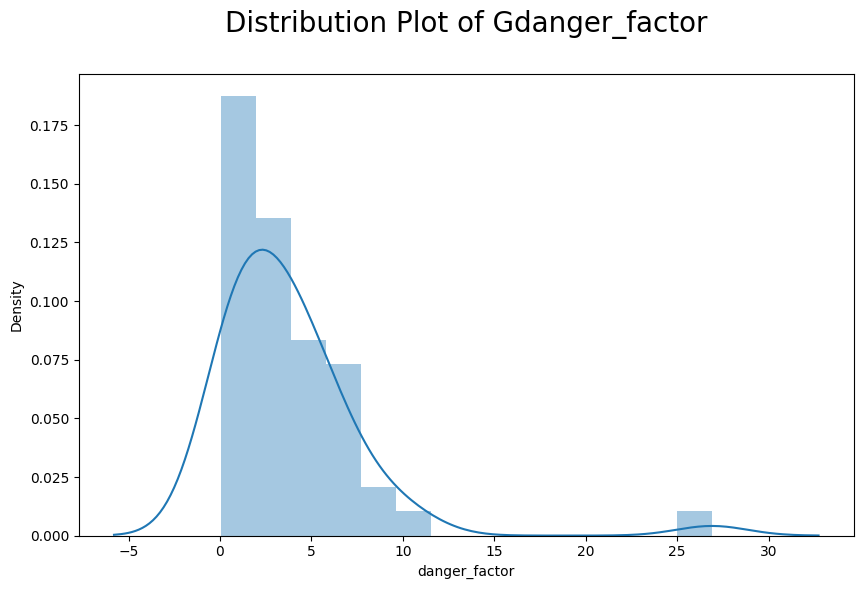

In [200]:
# 数据分布研究
#GDP 分布
plt.figure(figsize = (10, 6))
sns.distplot(data['danger_factor'])
plt.title('Distribution Plot of Gdanger_factor\n', fontsize =  20)
plt.savefig('result/danger_factor.png', dpi=300, bbox_inches='tight')
plt.show()

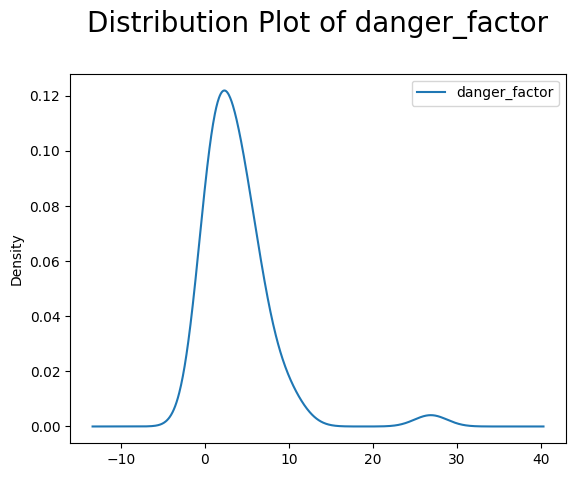

In [201]:
fig = plt.figure()
ax = fig.add_subplot(111)
topsis_USA['danger_factor'].plot(kind='kde', ax=ax)
# data.danger_factor.plot(kind='kde', ax=ax, color='red') # kde means Kernel Density Estimate plot using Gaussian kernels
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.title('Distribution Plot of danger_factor\n', fontsize =  20)
plt.savefig('result/danger_factor_2.png', dpi=300, bbox_inches='tight')
plt.show()

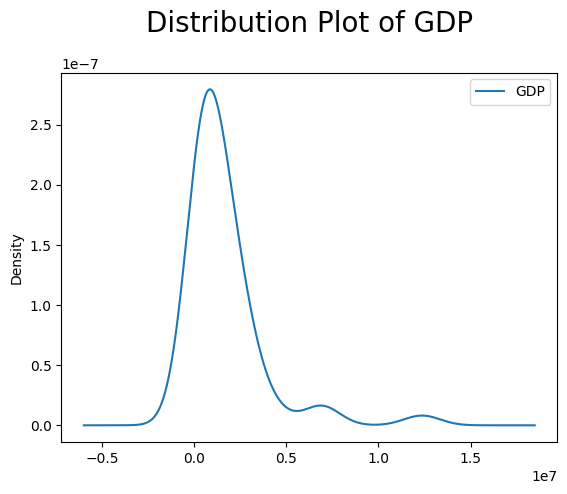

In [202]:
fig = plt.figure()
ax = fig.add_subplot(111)
topsis_USA['GDP'].plot(kind='kde', ax=ax)
# data.danger_factor.plot(kind='kde', ax=ax, color='red') # kde means Kernel Density Estimate plot using Gaussian kernels
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.title('Distribution Plot of GDP\n', fontsize =  20)
plt.savefig('result/GDP_1.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\JiangJinrui\AppData\Local\Temp\ipykernel_16376\2490249011.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


d:\Python3.9.7\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



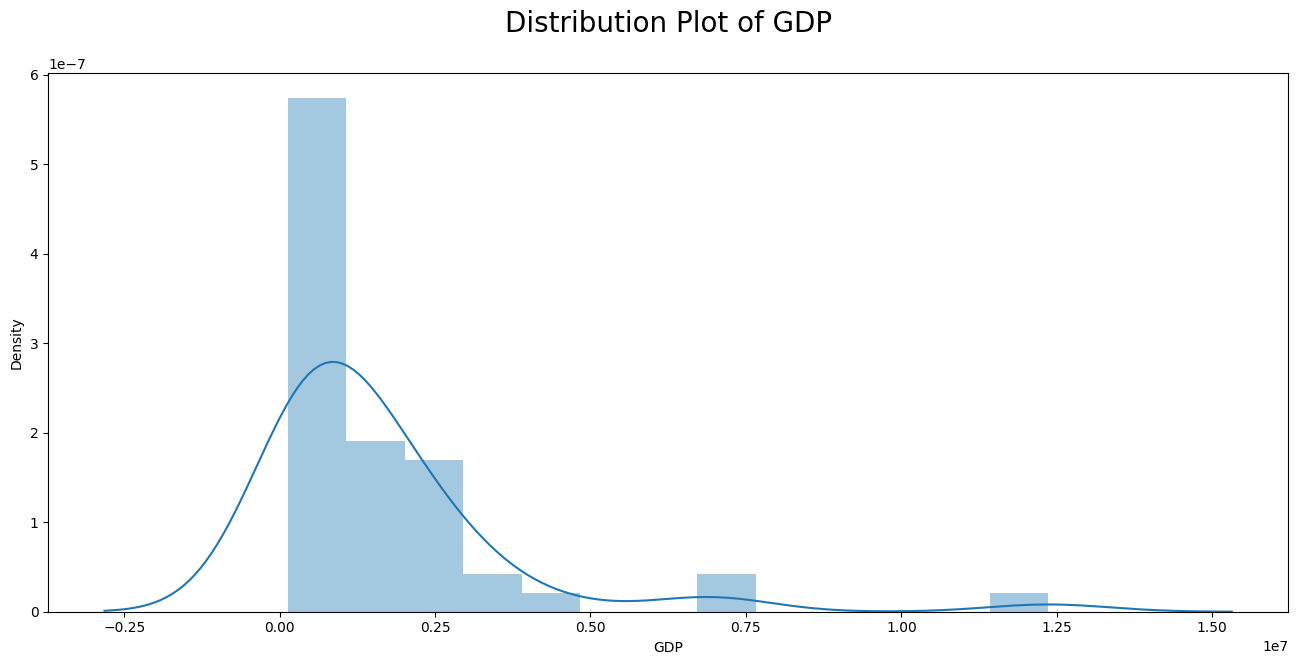

In [203]:
#GDP 分布
plt.figure(figsize = (16, 7))
sns.distplot(data['GDP'])
plt.title('Distribution Plot of GDP\n', fontsize =  20)
plt.savefig('result/GDP_2.png', dpi=300, bbox_inches='tight')
plt.show()

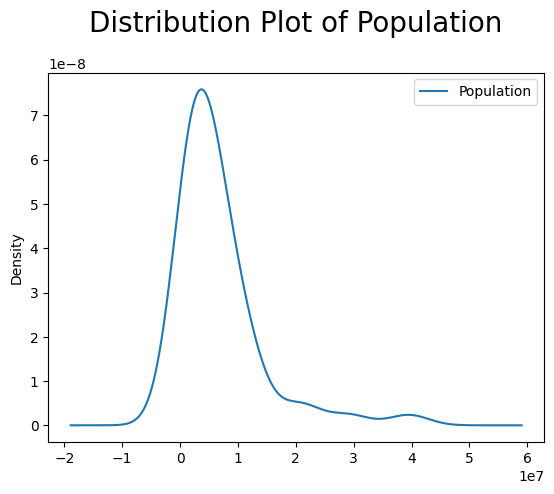

In [204]:
fig = plt.figure()
ax = fig.add_subplot(111)
topsis_USA['Population'].plot(kind='kde', ax=ax)
# data.danger_factor.plot(kind='kde', ax=ax, color='red') # kde means Kernel Density Estimate plot using Gaussian kernels
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.title('Distribution Plot of Population\n', fontsize =  20)
plt.savefig('result/population.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\JiangJinrui\AppData\Local\Temp\ipykernel_16376\1981442362.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


d:\Python3.9.7\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



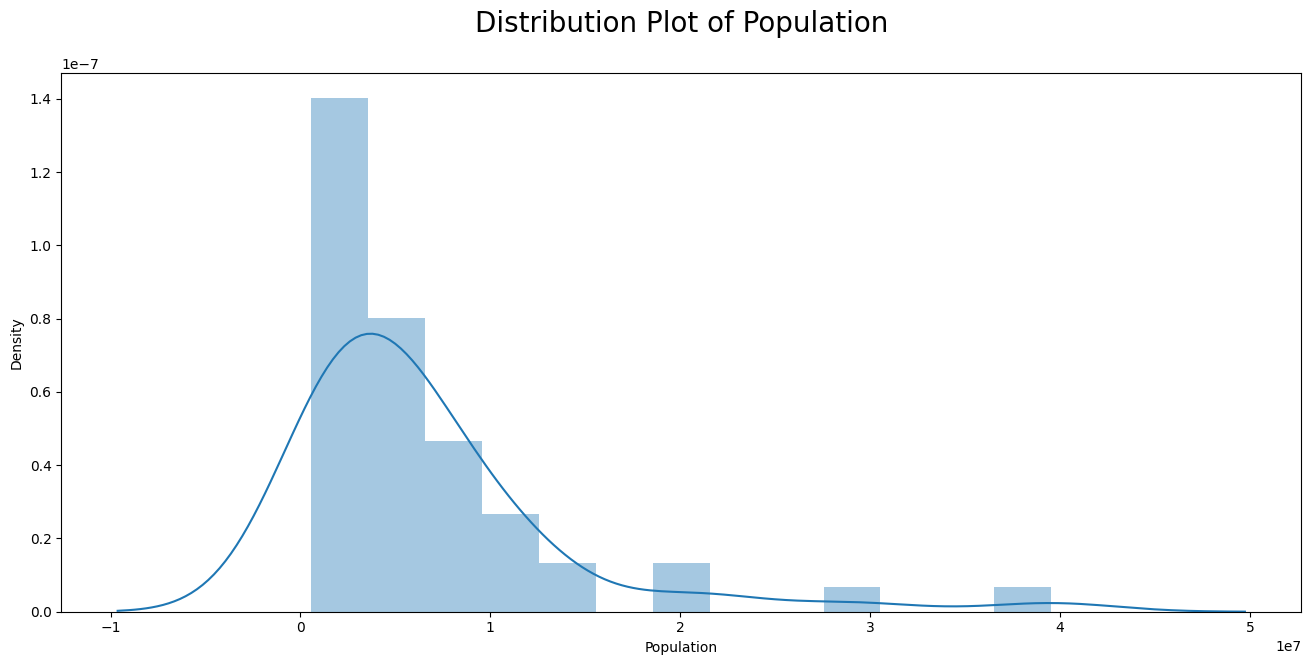

In [205]:
#Population 分布
plt.figure(figsize = (16, 7))
sns.distplot(data['Population'])
plt.title('Distribution Plot of Population\n', fontsize =  20)
plt.savefig('result/population_2.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\JiangJinrui\AppData\Local\Temp\ipykernel_16376\2855852757.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


d:\Python3.9.7\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



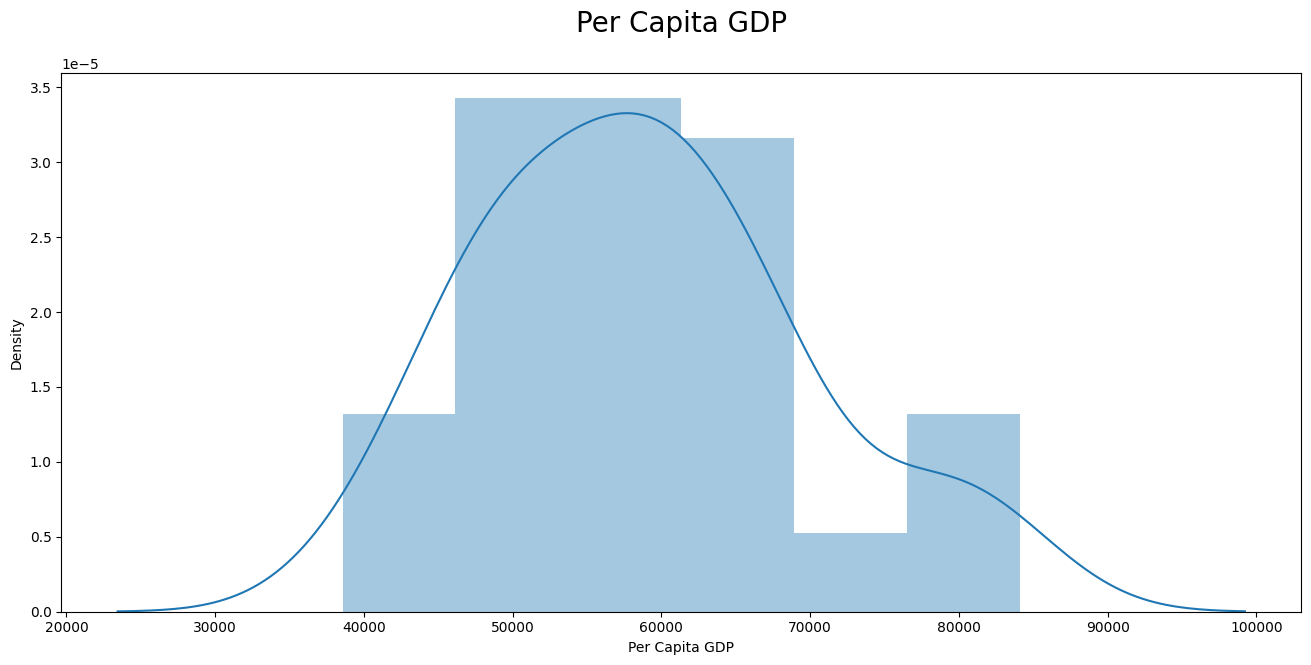

In [206]:
#per Capita GDP 分布
plt.figure(figsize = (16, 7))
sns.distplot(data['Per Capita GDP'])
plt.title('Per Capita GDP\n', fontsize =  20)
plt.savefig('result/per Capita_GDP_1.png', dpi=300, bbox_inches='tight')
plt.show()

d:\Python3.9.7\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

d:\Python3.9.7\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

d:\Python3.9.7\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

d:\Python3.9.7\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

d:\Python3.9.7\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

W

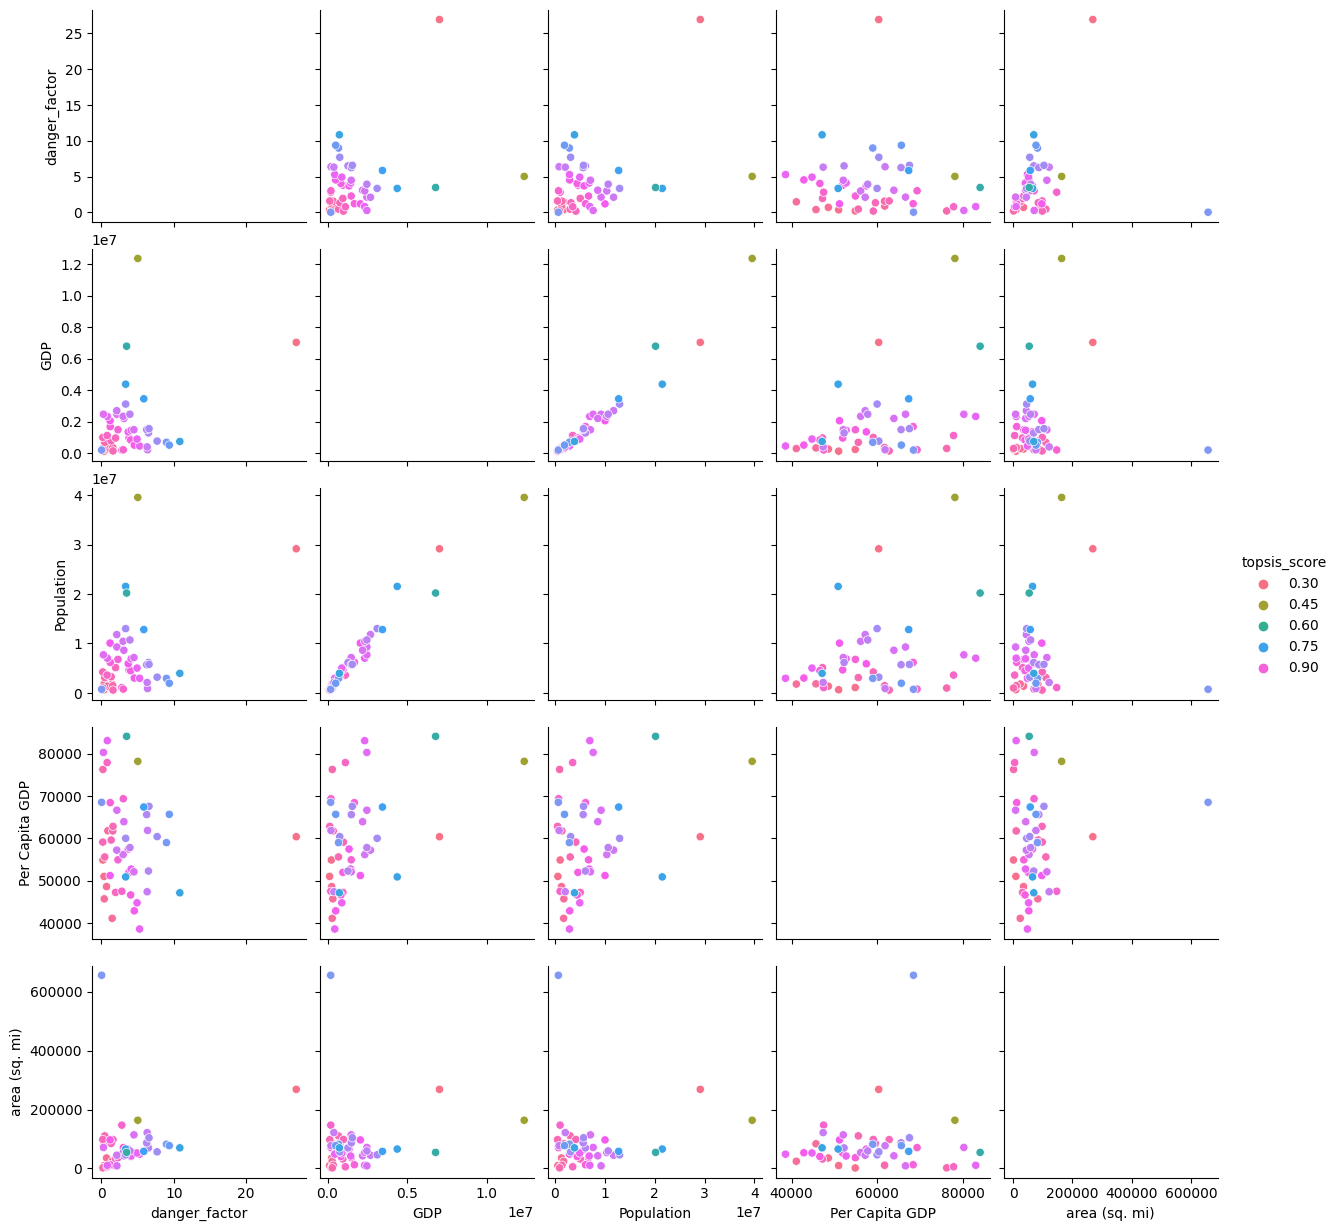

In [207]:
sns.pairplot(topsis_USA, hue="topsis_score", palette="husl")
plt.savefig('result/pairplot.png', dpi=300, bbox_inches='tight')

In [208]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 假设你的DataFrame为df，包含列STATE, danger_factor, GDP, Population, topsis_score, topsis_score_level
df = topsis_USA

# 将特征和目标变量分离
features = df[['danger_factor', 'GDP', 'Population','Per Capita GDP','area (sq. mi)']]
target = df['topsis_score_level']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# 创建支持向量机模型
svm_model = SVC()

# 使用训练集训练模型
svm_model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = svm_model.predict(X_test)
print(y_pred)
# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

TX= pd.DataFrame({'danger_factor': [26.9], 'GDP': [7038937.0], 
                  'Population': [29145505.0],
                  'Per Capita GDP':10000,
                  'area (sq. mi)':[695660.0]})
UNNKOWN=pd.DataFrame({'danger_factor': [5.858664], 
                      'GDP': [3454066.0], 
                      'Population': [12812508.0],
                      'Per Capita GDP':10000,
                      'area (sq. mi)':[160974.0]})

svm_prediction = svm_model.predict(TX)
svm_prediction_1 = svm_model.predict(UNNKOWN)
print("Texas topsis score prediction:", svm_prediction)
print("Unknown topsis score prediction:", svm_prediction_1)

['A' 'B' 'B' 'C' 'B' 'C' 'B' 'B' 'B' 'B']
Accuracy: 1.0
Texas topsis score prediction: ['C']
Unknown topsis score prediction: ['B']


In [209]:
# import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder


# 假设你的DataFrame为df，包含列STATE, danger_factor, GDP, Population, topsis_score, topsis_score_level
df=topsis_USA

# 将特征和目标变量分离
features = df[['danger_factor', 'GDP', 'Population','Per Capita GDP','area (sq. mi)']]
target = df['topsis_score_level']

# 数据预处理：标准化特征
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
# print(scaled_features)
# print(target)
target = target.values
# 创建LabelEncoder对象并进行标签编码
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(target)

print(encoded_labels)
# 输出: [0 1 0 2 1]

print(target)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(scaled_features, encoded_labels, test_size=0.2, random_state=42)

# 创建神经网络模型
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(5,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 编译模型
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 训练模型
model.fit(X_train, y_train, epochs=10, batch_size=32)

# 在测试集上评估模型
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 2 2 2 2 2 2 2 2]
['A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C']
Epoch 1/10
2/2 [==============================] - 0s 3ms/step - loss: 0.7676 - accuracy: 0.4250
Epoch 2/10
2/2 [==============================] - 0s 2ms/step - loss: 0.7466 - accuracy: 0.4750
Epoch 3/10
2/2 [==============================] - 0s 2ms/step - loss: 0.7354 - accuracy: 0.5000
Epoch 4/10
2/2 [==============================] - 0s 2ms/step - loss: 0.7211 - accuracy: 0.4750
Epoch 5/10
2/2 [==============================] - 0s 2ms/step - loss: 0.7064 - accuracy: 0.4750
Epoch 6/10
2/2 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.4750
Epoch 7/10
2/2 [==============================] - 0s 1ms/step - loss: 0.6812 - accuracy: 0.4750
Epoch 8/10
2/2 [=====

In [210]:
###修改数据
community=pd.read_csv(r'D:\VSCodeWorkSpace\2024_C\dataprocess\dataset_process\USA_TOPSIS_data.csv')
community.reset_index(drop=True, inplace=True)
community
#只保留数据前15行
community=community.iloc[:15,:]
community['Tourism Revenue']=community['GDP']
#赋值15个0-1内的服从正态分布的随机数
community['danger_factor']=np.random.normal(loc=8, scale=2, size=15)
community['Insurance Coverage']=np.random.normal(loc=0.5, scale=0.2, size=15)
# community['Tourism Infrastructure']=np.random.normal(loc=0.5, scale=0.2, size=15)
# community['Tourism Safety']=np.random.normal(loc=0.5, scale=0.2, size=15)
#文化遗产价值（Cultural Heritage Value）列，生成15个整数，范围为1-9
community['Cultural Heritage Value']=np.random.randint(low=1, high=10, size=15)
#Community Cultural Engagement，生成15个整数，范围1-3
community['Community Cultural Engagement']=np.random.randint(low=1, high=4, size=15)
#Commercial Activities
community['Commercial Activities']=np.random.randint(low=1, high=4, size=15)
#Structural Resilience
community['Structural Resilience']=np.random.randint(low=1, high=6, size=15)
#Artifact Preservation
community['Artifact Preservation']=np.random.randint(low=50, high=200, size=15)
#Employment Opportunities
community['Employment Opportunities']=np.random.randint(low=1, high=3000, size=15)
community.drop(['GDP','Population','Per Capita GDP','area (sq. mi)'], axis=1, inplace=True)
community.rename(columns={'STATE':'landmark'}, inplace=True)



In [211]:
#创建landmark映射表
landmark_mapping = {
    'ALABAMA':'Hongya Cave',
    'ALASKA':'Shanxi White Mountain',
    'ARIZONA':'Yellowstone National Park',
    'ARKANSAS':'Ciqikou Ancient Town',
    'CALIFORNIA':'Three Gorges Museum',
    'COLORADO':'Dazu Rock Carvings',
    'CONNECTICUT':'Great Hall of the People',
    'DELAWARE':'Huguang Guild Hall',
    'FLORIDA':'Chongqing People Liberation Monument',
    'GEORGIA':'Chongqing Grand Theatre',
    'HAWAII':'Arhat Temple',
    'IDAHO':'Stilwell Museum',
    'ILLINOIS':'Chongqing Museum of Natural History',
    'INDIANA':'Chongqing Library',
    'IOWA':'Chongqing Planning Exhibition Hall',
}
#将其映射过去
community['landmark'] = community['landmark'].map(landmark_mapping)
community.info()
community.to_csv('result/community_data.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   landmark                       15 non-null     object 
 1   danger_factor                  15 non-null     float64
 2   Tourism Revenue                15 non-null     float64
 3   Insurance Coverage             15 non-null     float64
 4   Cultural Heritage Value        15 non-null     int32  
 5   Community Cultural Engagement  15 non-null     int32  
 6   Commercial Activities          15 non-null     int32  
 7   Structural Resilience          15 non-null     int32  
 8   Artifact Preservation          15 non-null     int32  
 9   Employment Opportunities       15 non-null     int32  
dtypes: float64(3), int32(6), object(1)
memory usage: 968.0+ bytes


In [212]:
# 假设data_USA包含'GDP'、'population'和'danger_data'列
# 指定指标权重
random_array = np.random.dirichlet(np.ones(9), size=1)[0]
random_array /= np.sum(random_array)
random_array *= 1
weights = random_array

# 指定指标的优劣类型（"max"表示越大越好，"min"表示越小越好）
criteria = ["max", "max", "max","max","max","max","max","max","max"]

# 进行TOPSIS得分计算

a=community[['danger_factor', 'Tourism Revenue', 
             'Insurance Coverage','Cultural Heritage Value',
             'Community Cultural Engagement','Commercial Activities',
             'Structural Resilience','Artifact Preservation','Employment Opportunities']]
# print(a)
# 去掉列名
# a = a.drop(['GDP', 'Population', 'danger_factor'], axis=1)
# 将dataframe的值（除列名）转化为一个矩阵
a = a.values
# print(a)
result = topsis(a, weights, criteria)
# print(result)
b=pd.DataFrame(result[1])
# print(b)

# 将得分结果添加到原始DataFrame中
community['topsis_score'] = b

# 按TOPSIS得分降序排列
topsis_landmark = community.sort_values(by='topsis_score', ascending=False)
topsis_landmark.reset_index(drop=True, inplace=True)
# 打印结果
print(topsis_landmark[['landmark', 'topsis_score']])
topsis_landmark.to_csv('result/topsis_landmark_score.csv', index=False)
topsis_landmark

                                landmark  topsis_score
0                  Shanxi White Mountain      0.887881
1                      Chongqing Library      0.765276
2              Yellowstone National Park      0.761736
3                           Arhat Temple      0.755076
4                     Huguang Guild Hall      0.754982
5     Chongqing Planning Exhibition Hall      0.732751
6               Great Hall of the People      0.727892
7                            Hongya Cave      0.710244
8                        Stilwell Museum      0.709023
9                   Ciqikou Ancient Town      0.707471
10                    Dazu Rock Carvings      0.696039
11   Chongqing Museum of Natural History      0.679418
12               Chongqing Grand Theatre      0.635077
13  Chongqing People Liberation Monument      0.556044
14                   Three Gorges Museum      0.272569


,landmark,danger_factor,Tourism Revenue,Insurance Coverage,Cultural Heritage Value,Community Cultural Engagement,Commercial Activities,Structural Resilience,Artifact Preservation,Employment Opportunities,topsis_score
0,Shanxi White Mountain,4.510528,200986.0,0.090045,9,1,2,2,54,526,0.887881
1,Chongqing Library,6.054601,1490547.0,0.510575,2,2,2,4,105,1705,0.765276
2,Yellowstone National Park,7.777726,1489844.0,0.606223,2,2,1,2,80,1839,0.761736
3,Arhat Temple,7.112243,359425.0,0.725677,2,2,2,4,68,2811,0.755076
4,Huguang Guild Hall,6.926484,302050.0,0.662823,9,1,2,5,65,1810,0.754982
5,Chongqing Planning Exhibition Hall,6.056688,770841.0,0.460712,1,2,2,4,174,322,0.732751
6,Great Hall of the People,9.687644,1123600.0,0.495477,3,2,2,3,164,2883,0.727892
7,Hongya Cave,6.988709,899481.0,0.558467,1,3,2,4,170,2639,0.710244
8,Stilwell Museum,7.197905,336129.0,0.550991,8,3,3,2,179,1707,0.709023
9,Ciqikou Ancient Town,6.239854,516295.0,0.733134,6,1,2,4,149,1556,0.707471


相关性矩阵：
                               danger_factor  Tourism Revenue  \
danger_factor                       1.000000         0.031460   
Tourism Revenue                     0.031460         1.000000   
Insurance Coverage                  0.332017        -0.590053   
Cultural Heritage Value            -0.410234         0.164930   
Community Cultural Engagement       0.049625        -0.187711   
Commercial Activities              -0.234340        -0.178095   
Structural Resilience              -0.034758        -0.275266   
Artifact Preservation              -0.046263         0.153315   
Employment Opportunities           -0.119315         0.254534   

                               Insurance Coverage  Cultural Heritage Value  \
danger_factor                            0.332017                -0.410234   
Tourism Revenue                         -0.590053                 0.164930   
Insurance Coverage                       1.000000                -0.244683   
Cultural Heritage Value       

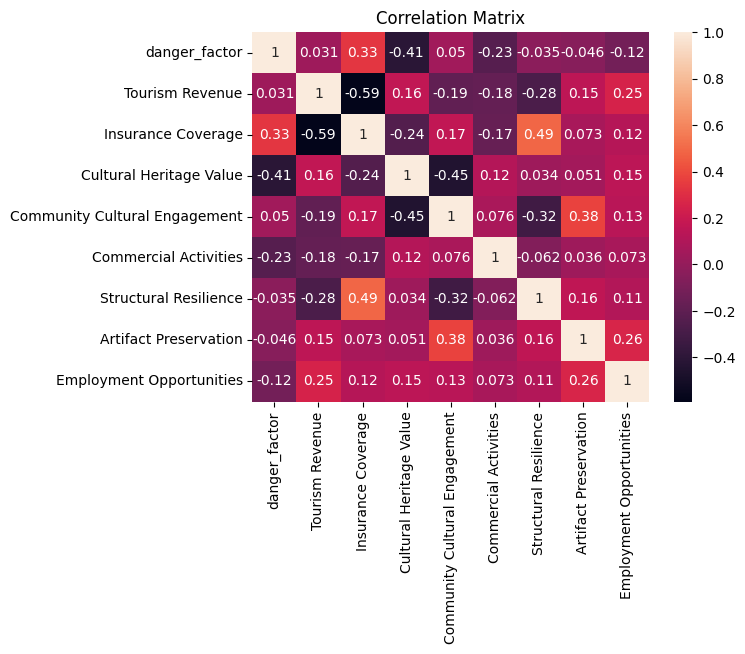

In [213]:
#数据相关性分析
data=topsis_landmark[['danger_factor', 'Tourism Revenue', 
             'Insurance Coverage','Cultural Heritage Value',
             'Community Cultural Engagement','Commercial Activities',
             'Structural Resilience','Artifact Preservation','Employment Opportunities']]
correlation_matrix = data.corr()
# 打印相关性矩阵
print("相关性矩阵：")
print(correlation_matrix)
# 绘制热力图
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.savefig('result/correlation_matrix_BIANDE.png',dpi=300,format='png',bbox_inches='tight')
plt.show()

d:\Python3.9.7\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

d:\Python3.9.7\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

d:\Python3.9.7\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

d:\Python3.9.7\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

d:\Python3.9.7\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

W

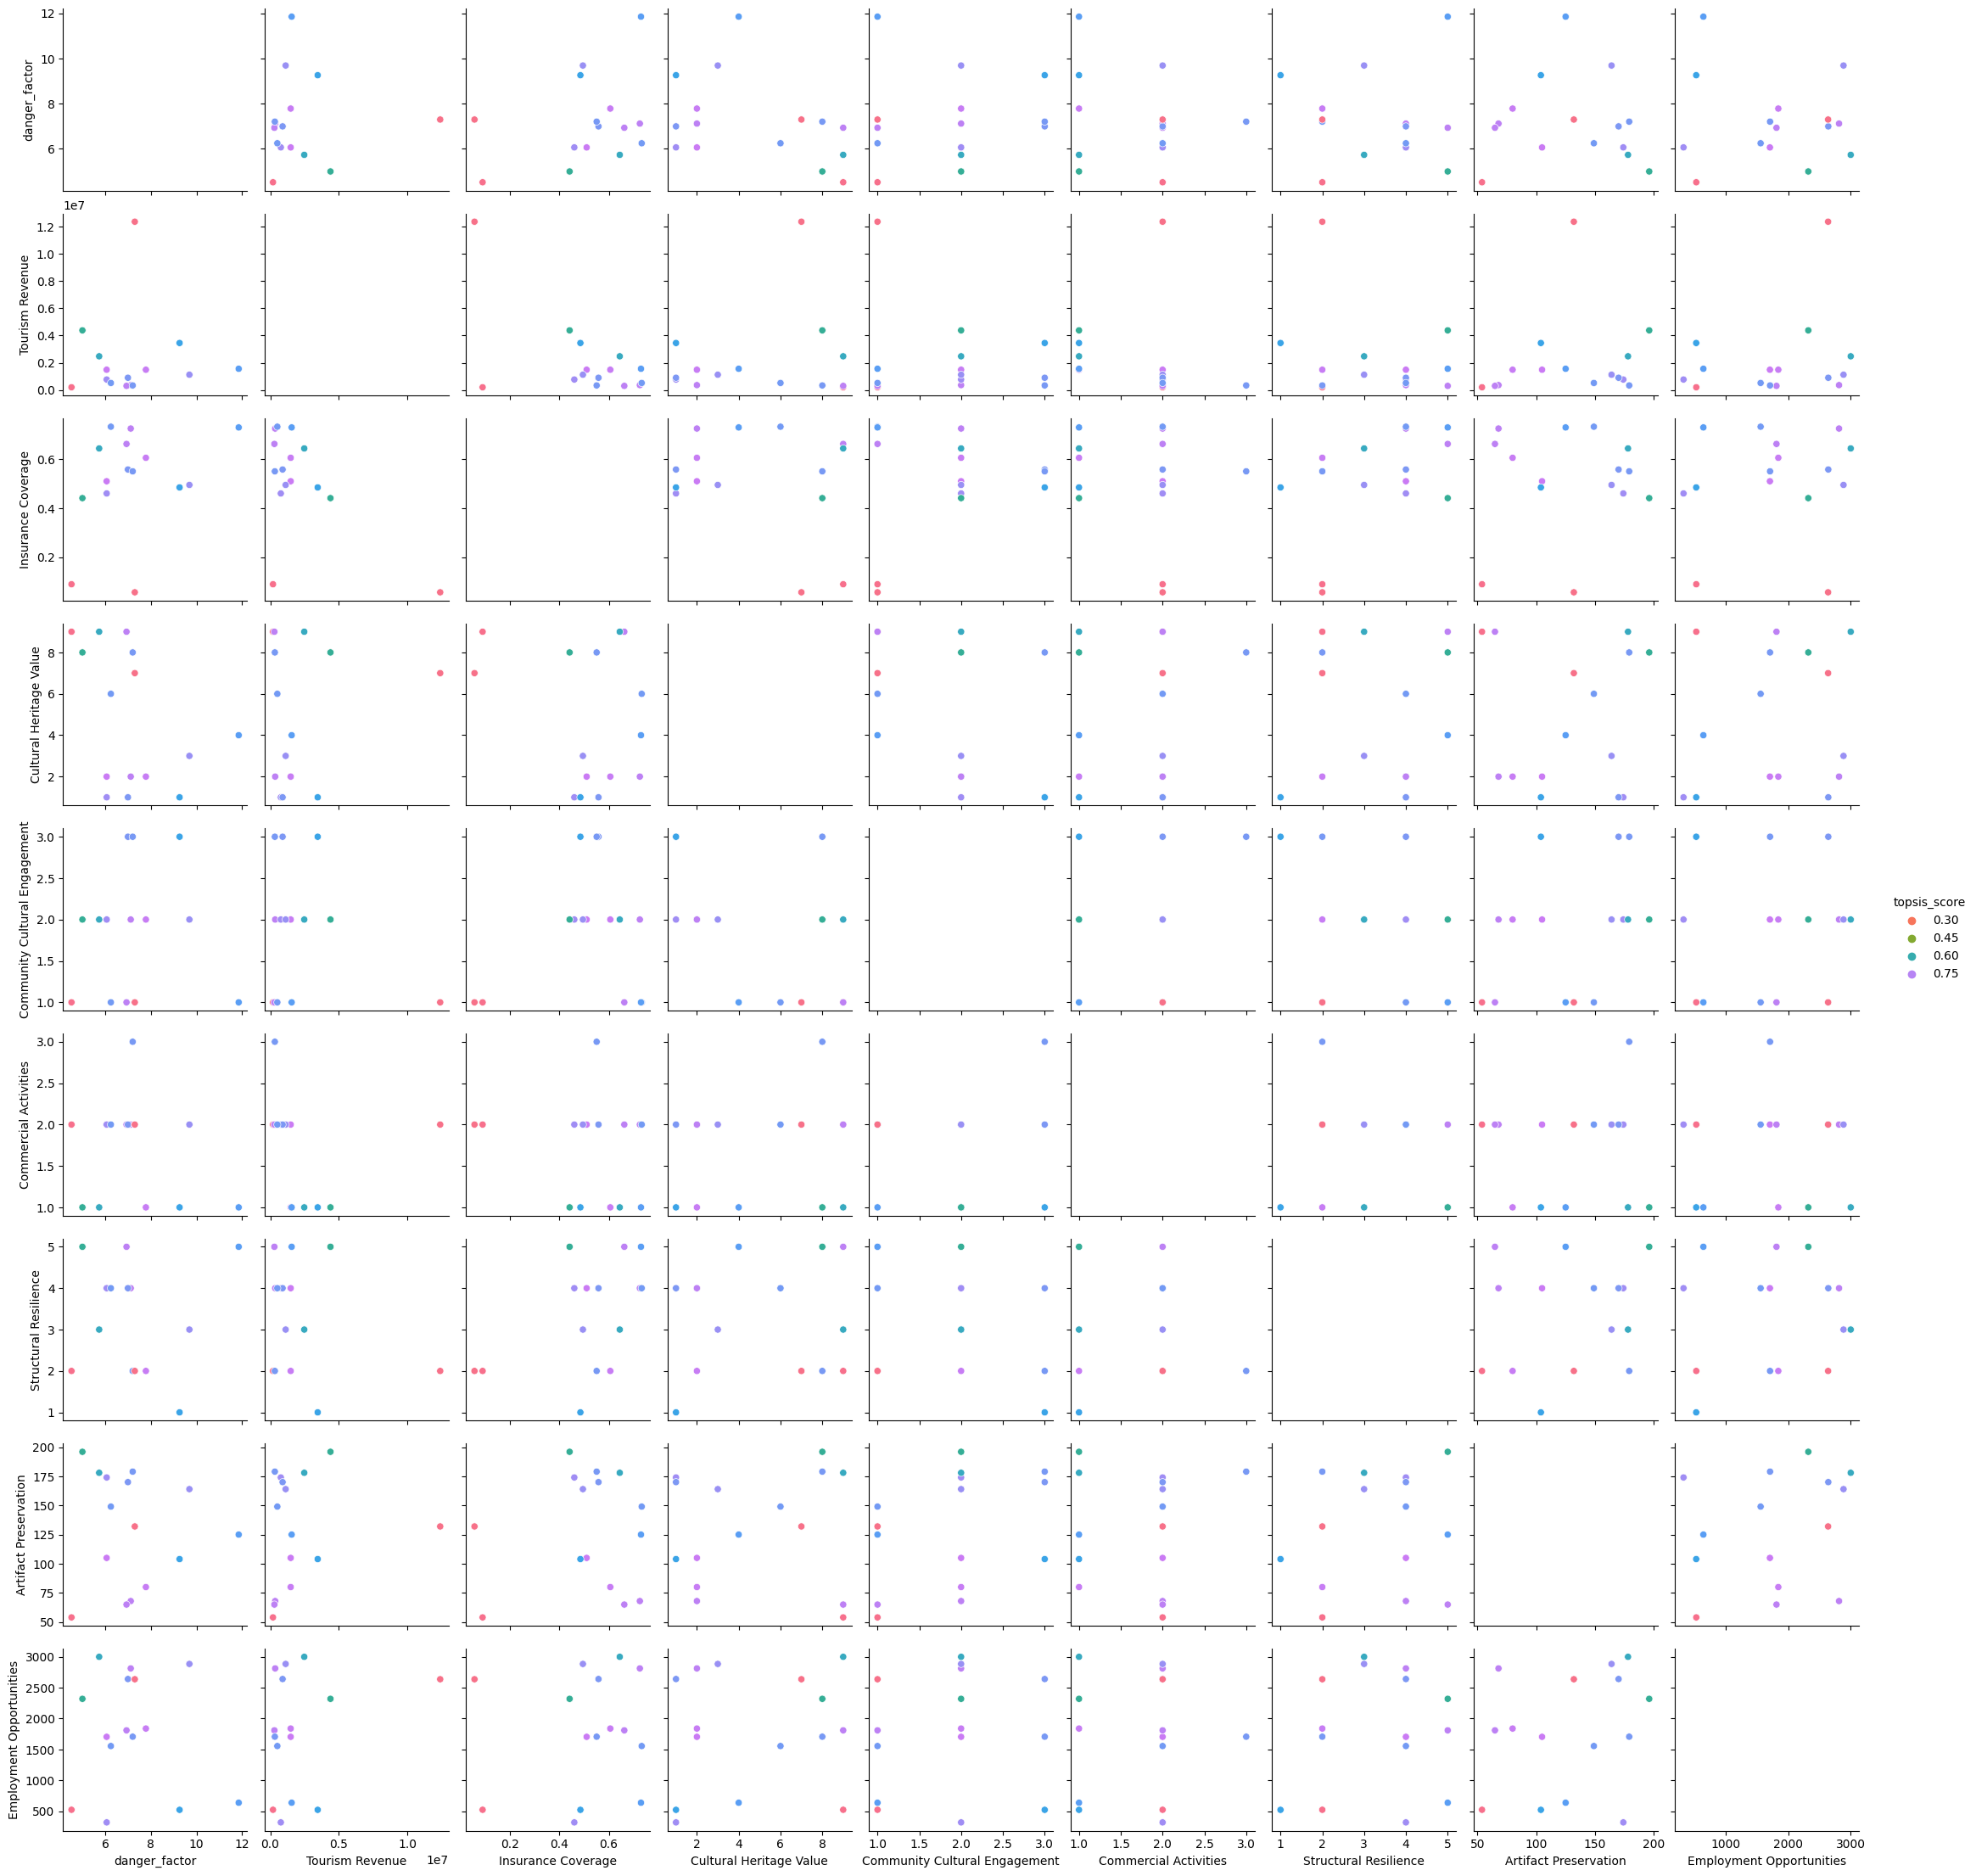

In [214]:
sns.pairplot(topsis_landmark, hue="topsis_score", palette="husl")

In [ ]:
#per Capita GDP 分布
plt.figure(figsize = (16, 7))
sns.distplot(topsis_landmark['topsis_score'])
plt.title('landmark topsis_score\n', fontsize =  20)
community.to_csv('result/topsis_score.csv', index=False)
plt.show()

0     0.887881
1     0.765276
2     0.761736
3     0.755076
4     0.754982
5     0.732751
6     0.727892
7     0.710244
8     0.709023
9     0.707471
10    0.696039
11    0.679418
12    0.635077
13    0.556044
14    0.272569
Name: topsis_score, dtype: float64
<class 'pandas.core.series.Series'>
RangeIndex: 15 entries, 0 to 14
Series name: topsis_score
Non-Null Count  Dtype  
--------------  -----  
15 non-null     float64
dtypes: float64(1)
memory usage: 248.0 bytes


<Axes: xlabel='danger_factor', ylabel='topsis_score'>

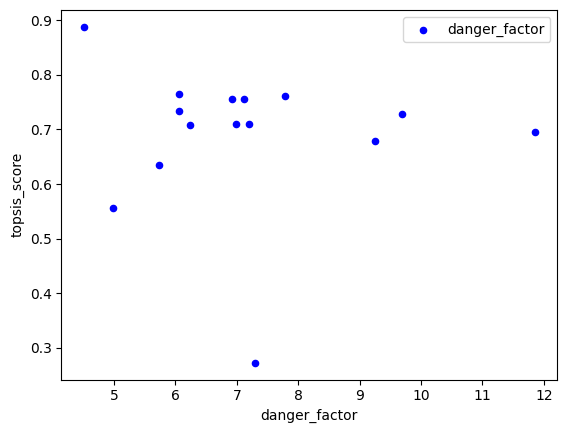

In [226]:
score=topsis_landmark['topsis_score'].sort_values(ascending=False)
print(score)
score.info()
topsis_landmark.plot(kind='scatter', x='danger_factor', y='topsis_score', color='blue', label='danger_factor')

d:\Python3.9.7\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

d:\Python3.9.7\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



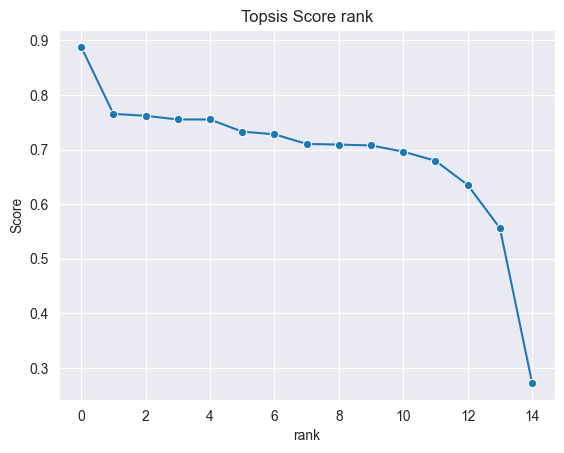

In [232]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 假设我们已经有了一个包含score的列表
# score_list = [100, 90, 80, 70, 60, 50, 40, 30, 20, 10]

# 将score列表转换为一个DataFrame
score_df = pd.DataFrame({'score': score})

# 调整图表样式
sns.set_style('darkgrid')
# 绘制折线图
line_plot = sns.lineplot(data=score_df, x=score_df.index, y='score',marker='o')

# 设置图表标题和轴标签
line_plot.set_title('Topsis Score rank')
line_plot.set_xlabel('rank')
line_plot.set_ylabel('Score')
plt.savefig('result/Topsis_score_rank.png',dpi=300,format='png',bbox_inches='tight')
# 显示图表
plt.show()



In [223]:
topsis_USA
fig = px.choropleth(topsis_USA,
                    locations="STATE", 
                    locationmode="USA-states", 
                    color="Per Capita GDP", 
                    hover_name="STATE",
                    scope="usa",
                    color_continuous_scale=px.colors.diverging.BrBG,
                    title="Relative Per Capita GDP")
fig.show()

# topsis_USA, locations='STATE',
#                     locationmode='USA-states', color='topsis_score',
#                     scope='usa', 
#                     color_continuous_scale='Magma',
#                     # color_continuous_midpoint=15,  # 设置颜色划分的中点值
#                     # range_color=(1,1),  # 设置颜色划分的步长
#                     labels={'topsis_score': 'topsis_score'})
